# <center> Feature Clustering for Support Identification in Extreme Regions
This notebook loads the results of Anomaly Detection task and analyze the results

# Import libraires

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp, mannwhitneyu

# Tool functions for the analysis

In [2]:
col_roc = '#253494'
col_pr = '#006d2c'

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)
    
def show_violin(name):
    roc_damex = np.load('results/without_dykstra/roc_damex_'+name+'.npy')
    roc_mex = np.load('results/without_dykstra/roc_mex_'+name+'.npy')
    
    pr_damex = np.load('results/without_dykstra/pr_damex_'+name+'.npy')
    pr_mex = np.load('results/without_dykstra/pr_mex_'+name+'.npy')

    plt.violinplot([roc_damex,roc_mex,pr_damex,pr_mex],positions = [1,2,4,5])
    plt.title(name,fontsize=15)
    plt.xticks(ticks = [1,2,4,5],labels = ['AUC Damex','AUC Mex','PR Damex','PR Mex'],fontsize=10)
    plt.show()
    
def display_results(name):
    roc_if = np.load('results/without_dykstra/roc_if_'+name+'.npy')
    roc_damex = np.load('results/without_dykstra/roc_damex_'+name+'.npy')
    roc_mex = np.load('results/without_dykstra/roc_mex_'+name+'.npy')
    pr_if = np.load('results/without_dykstra/pr_if_'+name+'.npy')
    pr_damex = np.load('results/without_dykstra/pr_damex_'+name+'.npy')
    pr_mex = np.load('results/without_dykstra/pr_mex_'+name+'.npy')
    print('ROC_AUC scores')
    print('IF    :',round(np.mean(roc_if),6),'+-',round(np.std(roc_if),6))
    print('DAMEX :',round(np.mean(roc_damex),6),'+-',round(np.std(roc_damex),6))
    print('MEXICO:',round(np.mean(roc_mex),6),'+-',round(np.std(roc_mex),6))
    print('PR scores')
    print('IF    :',round(np.mean(pr_if),6),'+-',round(np.std(pr_if),6))
    print('DAMEX :',round(np.mean(pr_damex),6),'+-',round(np.std(pr_damex),6))
    print('MEXICO:',round(np.mean(pr_mex),6),'+-',round(np.std(pr_mex),6))
    return None

def display_results_dyk(name):
    roc_if = np.load('results/with_dykstra/roc_if_dyk_'+name+'.npy')
    roc_damex = np.load('results/with_dykstra/roc_damex_dyk_'+name+'.npy')
    roc_mex = np.load('results/with_dykstra/roc_mex_dyk_'+name+'.npy')
    pr_if = np.load('results/with_dykstra/pr_if_dyk_'+name+'.npy')
    pr_damex = np.load('results/with_dykstra/pr_damex_dyk_'+name+'.npy')
    pr_mex = np.load('results/with_dykstra/pr_mex_dyk_'+name+'.npy')
    print('ROC_AUC scores')
    print('IF    :',round(np.mean(roc_if),6),'+-',round(np.std(roc_if),6))
    print('DAMEX :',round(np.mean(roc_damex),6),'+-',round(np.std(roc_damex),6))
    print('MEXICO:',round(np.mean(roc_mex),6),'+-',round(np.std(roc_mex),6))
    print('PR scores')
    print('IF    :',round(np.mean(pr_if),6),'+-',round(np.std(pr_if),6))
    print('DAMEX :',round(np.mean(pr_damex),6),'+-',round(np.std(pr_damex),6))
    print('MEXICO:',round(np.mean(pr_mex),6),'+-',round(np.std(pr_mex),6))
    return None

def show(name):
    roc_if = np.load('results/without_dykstra/roc_if_'+name+'.npy')
    roc_damex = np.load('results/without_dykstra/roc_damex_'+name+'.npy')
    roc_mex = np.load('results/without_dykstra/roc_mex_'+name+'.npy')

    pr_if = np.load('results/without_dykstra/pr_if_'+name+'.npy')
    pr_damex = np.load('results/without_dykstra/pr_damex_'+name+'.npy')
    pr_mex = np.load('results/without_dykstra/pr_mex_'+name+'.npy')
    
    plt.figure(figsize=(10,5))
    bp_roc = plt.boxplot([roc_if,roc_damex,roc_mex], positions = [1, 4, 7], widths = 0.6,sym='')
    set_box_color(bp_roc, col_roc)

    bp_pr = plt.boxplot([pr_if,pr_damex,pr_mex], positions = [2, 5, 8], widths = 0.6,sym='')
    set_box_color(bp_pr, col_pr)

    plt.plot([], c=col_roc, label='ROC score')
    plt.plot([], c=col_pr, label='PR score')

    # set axes limits and labels
    plt.xlim(0,9)
    plt.ylim(0,1)
    plt.xticks([1.5, 4.5, 7.5],labels=['iForest', 'Damex', 'Mexico'],fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend(loc='lower right')
    plt.title(name)
    plt.show()
    return None

def show_test(name,cut):
    p_seuil = 0.05
    from scipy.stats import mannwhitneyu, ks_2samp
    roc_damex = np.load('results/without_dykstra/roc_damex_'+name+'.npy')[:cut]
    roc_mex = np.load('results/without_dykstra/roc_mex_'+name+'.npy')[:cut]
    pr_damex = np.load('results/without_dykstra/pr_damex_'+name+'.npy')[:cut]
    pr_mex = np.load('results/without_dykstra/pr_mex_'+name+'.npy')[:cut]
    print(name)
    print(mannwhitneyu(roc_damex, roc_mex)[1])
    print(ks_2samp(roc_damex, roc_mex)[1])
    if np.logical_and((mannwhitneyu(roc_damex, roc_mex)[1] <= p_seuil), 
                      (ks_2samp(roc_damex, roc_mex)[1] <= p_seuil)):
        print("one distribution is better than the second")
    else:
        print("same perf")
    print('________________')

# 1. LOAD RESULTS AND DISPLAY BOXPLOTS

## 1.SF, $\tau = 0.8, \lambda = 10, m = 2$

In [3]:
display_results('SF') 

ROC_AUC scores
IF    : 0.380728 +- 0.085703
DAMEX : 0.709504 +- 0.030803
MEXICO: 0.892251 +- 0.013155
PR scores
IF    : 0.393454 +- 0.081276
DAMEX : 0.649259 +- 0.033887
MEXICO: 0.811605 +- 0.0163


In [4]:
display_results_dyk('SF')

ROC_AUC scores
IF    : 0.380728 +- 0.085703
DAMEX : 0.709504 +- 0.030803
MEXICO: 0.708172 +- 0.03002
PR scores
IF    : 0.393454 +- 0.081276
DAMEX : 0.649259 +- 0.033887
MEXICO: 0.660999 +- 0.031488


In [5]:
show('SF')

## 2. HTTP, $\tau = 0.5, \lambda = 10, m = 2$

In [6]:
display_results('http')

ROC_AUC scores
IF    : 0.656469 +- 0.094295
DAMEX : 0.996327 +- 0.002335
MEXICO: 0.99518 +- 0.00531
PR scores
IF    : 0.657704 +- 0.099467
DAMEX : 0.968449 +- 0.008609
MEXICO: 0.971855 +- 0.012258


In [7]:
display_results_dyk('http')

ROC_AUC scores
IF    : 0.656469 +- 0.094295
DAMEX : 0.996327 +- 0.002335
MEXICO: 0.997369 +- 0.002561
PR scores
IF    : 0.657704 +- 0.099467
DAMEX : 0.968449 +- 0.008609
MEXICO: 0.971134 +- 0.008621


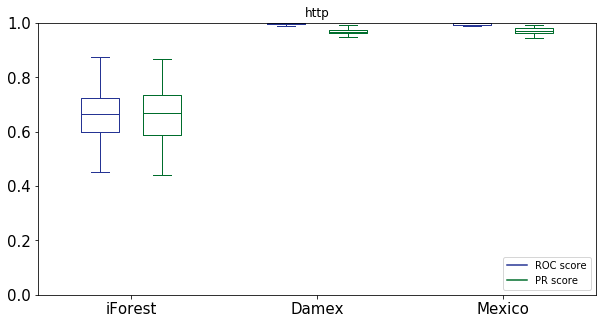

In [8]:
show('http')

## 3.Shuttle , $\tau = 0.7, \lambda = 5, m = 3$

In [9]:
display_results('shuttle') 

ROC_AUC scores
IF    : 0.969614 +- 0.020427
DAMEX : 0.989743 +- 0.00297
MEXICO: 0.989768 +- 0.002644
PR scores
IF    : 0.825981 +- 0.055207
DAMEX : 0.864435 +- 0.026314
MEXICO: 0.863488 +- 0.036599


In [10]:
display_results_dyk('shuttle')

ROC_AUC scores
IF    : 0.969614 +- 0.020427
DAMEX : 0.989743 +- 0.00297
MEXICO: 0.988919 +- 0.002856
PR scores
IF    : 0.825981 +- 0.055207
DAMEX : 0.864435 +- 0.026314
MEXICO: 0.818017 +- 0.023649


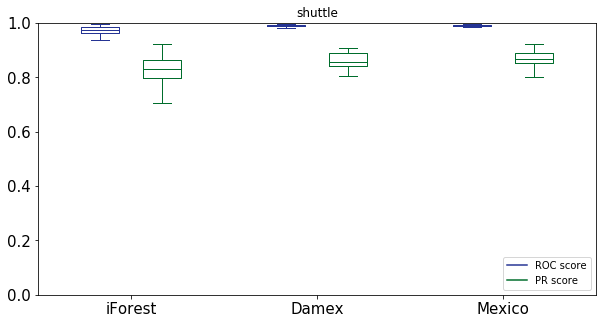

In [11]:
show('shuttle')

## 4.Forest $\tau = 0.7, \lambda = 5, m = 3$

In [12]:
display_results('forest') 

ROC_AUC scores
IF    : 0.653847 +- 0.095587
DAMEX : 0.761806 +- 0.007667
MEXICO: 0.86254 +- 0.014893
PR scores
IF    : 0.894251 +- 0.036697
DAMEX : 0.893324 +- 0.010184
MEXICO: 0.95821 +- 0.006353


In [13]:
display_results_dyk('forest') 

ROC_AUC scores
IF    : 0.653847 +- 0.095587
DAMEX : 0.761806 +- 0.007667
MEXICO: 0.851132 +- 0.008097
PR scores
IF    : 0.894251 +- 0.036697
DAMEX : 0.893324 +- 0.010184
MEXICO: 0.95382 +- 0.004151


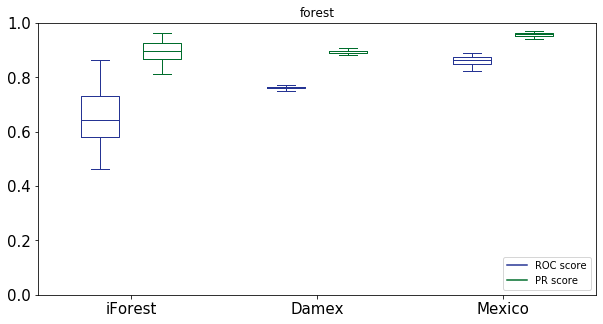

In [14]:
show('forest')

## 5.SA, $\tau = 0.7, \lambda = 5, m = 3$

In [15]:
display_results('SA')

ROC_AUC scores
IF    : 0.886493 +- 0.032356
DAMEX : 0.98219 +- 0.001841
MEXICO: 0.980887 +- 0.005849
PR scores
IF    : 0.878628 +- 0.030737
DAMEX : 0.938282 +- 0.011558
MEXICO: 0.939628 +- 0.031118


In [16]:
display_results_dyk('SA')

ROC_AUC scores
IF    : 0.886493 +- 0.032356
DAMEX : 0.98219 +- 0.001841
MEXICO: 0.982911 +- 0.002359
PR scores
IF    : 0.878628 +- 0.030737
DAMEX : 0.938282 +- 0.011558
MEXICO: 0.949254 +- 0.011247


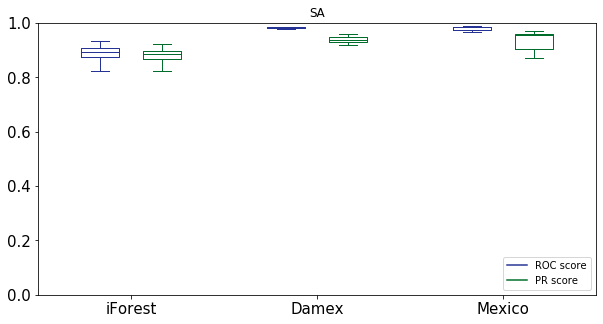

In [17]:
show('SA')

# Deeper analysis

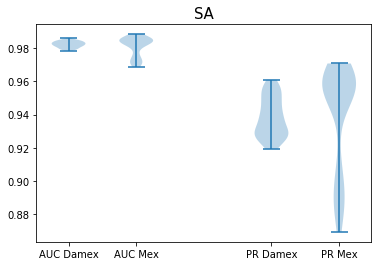

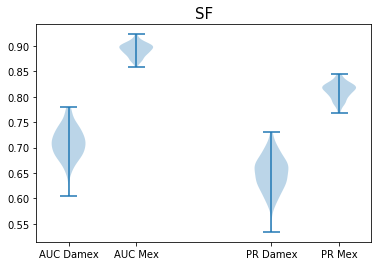

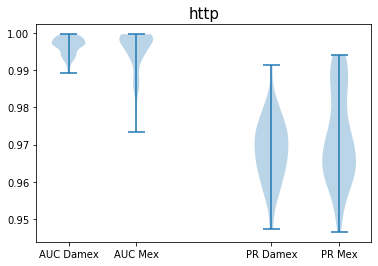

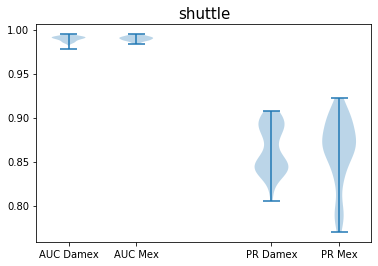

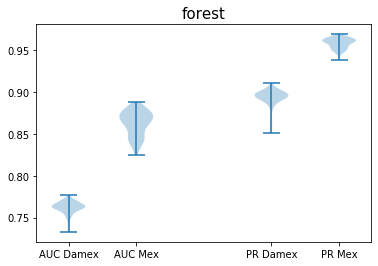

In [18]:
names = ['SA','SF','http','shuttle','forest']
for name in names:
    show_violin(name)

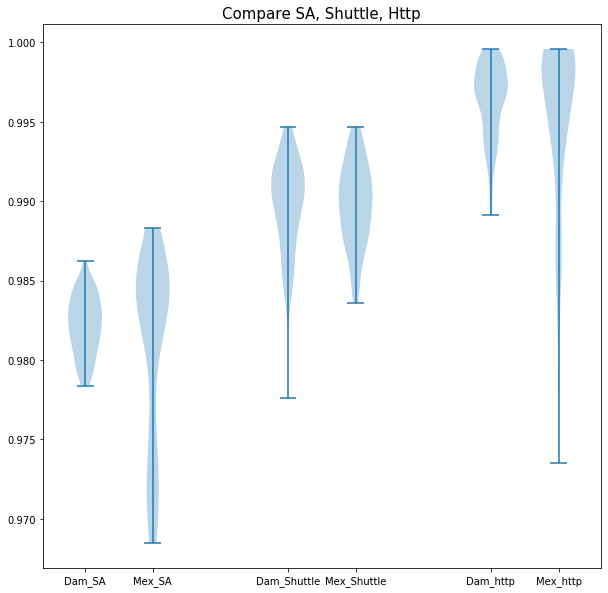

In [20]:
roc_damex_SA = np.load('results/without_dykstra/roc_damex_SA.npy')
roc_mex_SA = np.load('results/without_dykstra/roc_mex_SA.npy')  

roc_damex_shuttle = np.load('results/without_dykstra/roc_damex_shuttle.npy')
roc_mex_shuttle = np.load('results/without_dykstra/roc_mex_shuttle.npy')  

roc_damex_http = np.load('results/without_dykstra/roc_damex_http.npy')
roc_mex_http = np.load('results/without_dykstra/roc_mex_http.npy')  

data = [roc_damex_SA,roc_mex_SA,
        roc_damex_shuttle,roc_mex_shuttle,
        roc_damex_http,roc_mex_http]

label_names = ['Dam_SA','Mex_SA','Dam_Shuttle','Mex_Shuttle', 'Dam_http', 'Mex_http']

x_pos = [1,2,4,5,7,8]

plt.figure(figsize=(10,10))
plt.violinplot(data,positions = x_pos)
plt.title('Compare SA, Shuttle, Http',fontsize=15)
plt.xticks(ticks = x_pos,labels = label_names,fontsize=10)
plt.show()

In [21]:
for name in names:
    show_test(name,cut=100)

SA
0.06474415148103989
0.0004117410017938115
same perf
________________
SF
1.2810718345817004e-34
2.2087606931995054e-59
one distribution is better than the second
________________
http
0.46349716631229987
0.0061340334218580265
same perf
________________
shuttle
0.35927406533371076
0.5830090612540064
same perf
________________
forest
1.2810718345817004e-34
2.2087606931995054e-59
one distribution is better than the second
________________
